In [1]:
import time
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

from load_data import load_data

In [2]:
X,y = load_data('data.txt')



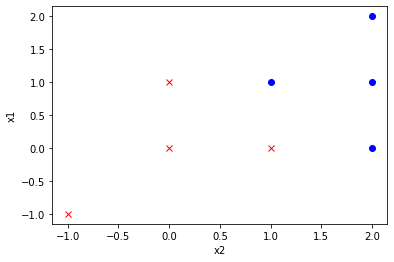

In [3]:
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'rx')
plt.plot(X[np.where(y==-1)[0], 0], X[np.where(y==-1)[0], 1], 'bo')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

In [4]:
t = time.time()
C = 1
m,n = X.shape
P = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        if i == j:
            P[i,j] = y[i,:] * y[j,:] * np.dot(X[i, :].T, X[j,:])
            continue
        P[i,j] = 0.5 * y[i,:] * y[j,:] * np.dot(X[i, :].T, X[j,:])
P = matrix(P)

In [5]:
q = -np.ones((m,1))
q = matrix(q,(m,1), 'd')

In [6]:
g1 = np.eye(m)
g2 = -np.eye(m)
g = np.concatenate((g1, g2), axis = 0)
G = matrix(g)

In [7]:
h1 = C * np.ones((m,1))
h2 = np.zeros((m,1))
h = np.concatenate((h1, h2), axis = 0)
h = matrix(h)
A = matrix(y.T, (1,8), 'd')
b = matrix(0.0)

In [8]:
sol=solvers.qp(P, q, G, h, A, b)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -1.5633e+00 -1.3068e+01  4e+01  2e+00  4e-16
 1: -1.3162e+00 -6.7149e+00  5e+00  3e-16  3e-16
 2: -1.5629e+00 -2.0804e+00  5e-01  2e-16  3e-16
 3: -1.6785e+00 -1.7337e+00  6e-02  2e-16  2e-16
 4: -1.7011e+00 -1.7051e+00  4e-03  2e-16  3e-16
 5: -1.7033e+00 -1.7037e+00  3e-04  2e-16  3e-16
 6: -1.7036e+00 -1.7036e+00  2e-05  2e-16  2e-16
 7: -1.7036e+00 -1.7036e+00  2e-07  2e-16  2e-16
Optimal solution found.
[ 1.00e+00]
[ 3.57e-02]
[ 3.93e-01]
[ 1.86e-01]
[ 1.32e-05]
[ 1.00e+00]
[ 6.14e-01]
[ 1.09e-09]



In [9]:
elapsed = time.time() - t
print('time taken ', elapsed)

time taken  0.09092855453491211


In [10]:
alpha = np.array(sol['x'])
w = np.sum(alpha * y * X, axis=0)
bias = np.mean(y - np.dot(X, w.T))

In [11]:
print('Final hyper plane parameters - ')
print('W: ', w.T, 'and b:', bias)
print('Number of support vectors: ', len(alpha))

Final hyper plane parameters - 
W:  [-1.22857596 -0.6428666 ] and b: 1.3964372666199916
Number of support vectors:  8


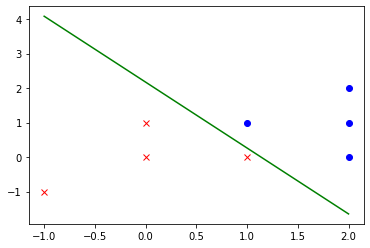

In [12]:
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 'rx')
plt.plot(X[np.where(y==-1)[0], 0], X[np.where(y==-1)[0], 1], 'bo')
x1, x2 = np.min(X[:,1]), np.max(X[:,1])
y1 = -w[0]/w[1] * x1 - bias/w[1]
y2 = -w[0]/w[1] * x2 - bias/w[1]
plt.plot([x1, x2], [y1,y2], color='green')
plt.show()